In [1]:
from importlib import reload

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns


import langmap
import walsdata as wd
from walsdata import s229, s229d
from walsdata import s280, s280d

In [85]:
sns.set_context(context='talk')

### Mapping

In [2]:
wd.langs.head()

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,ISO_codes,Samples_100,Samples_200
0,aab,Arapesh (Abu),NaN,-3.450000,142.950000,NaN,NaN,Torricelli,NaN,Kombio-Arapesh,NaN,False,False
1,aar,Aari,NaN,6.000000,36.583333,aari1239,aiw,Afro-Asiatic,Omotic,South Omotic,aiw,False,False
2,aba,Abau,NaN,-4.000000,141.250000,abau1245,aau,Sepik,NaN,Upper Sepik,aau,False,False
3,abb,Arabic (Chadian),NaN,13.833333,20.833333,chad1249,shu,Afro-Asiatic,NaN,Semitic,shu,False,False
4,abd,Abidji,NaN,5.666667,-4.583333,abid1235,abi,Niger-Congo,NaN,Kwa,abi,False,False


In [3]:
len(wd.langs)

2662

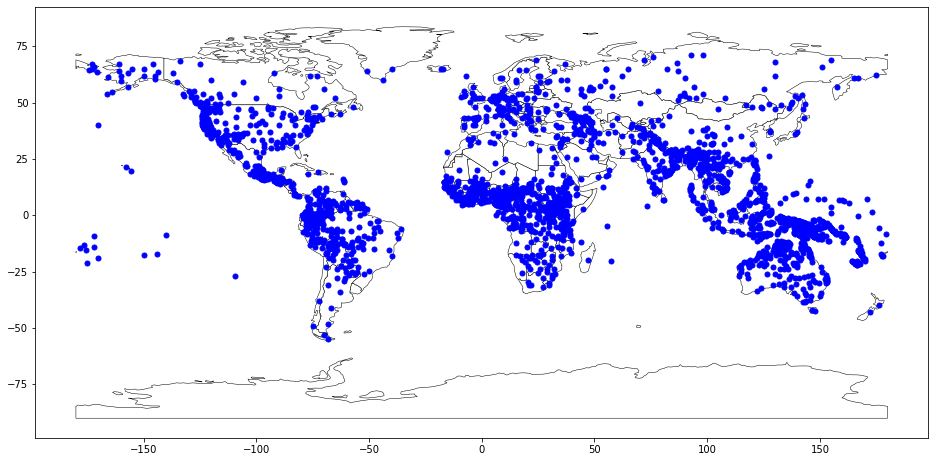

In [4]:
langmap.plot(wd.langs_geo)
plt.show()

### Exploring Features

In [5]:
wd.features.head()

,ID,Name,Description,Contributor_ID,Chapter,Area
0,1A,Consonant Inventories,NaN,maddiesoni,Consonant Inventories,Phonology
1,2A,Vowel Quality Inventories,NaN,maddiesoni,Vowel Quality Inventories,Phonology
2,3A,Consonant-Vowel Ratio,NaN,maddiesoni,Consonant-Vowel Ratio,Phonology
3,4A,Voicing in Plosives and Fricatives,NaN,maddiesoni,Voicing in Plosives and Fricatives,Phonology
4,5A,Voicing and Gaps in Plosive Systems,NaN,maddiesoni,Voicing and Gaps in Plosive Systems,Phonology


In [6]:
len(wd.features)

192

In [7]:
wd.values.head()

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
0,81A-aab,aab,81A,2,81A-2,NaN,Nekitel-1985[94],NaN
1,82A-aab,aab,82A,1,82A-1,NaN,Nekitel-1985[94],NaN
2,83A-aab,aab,83A,2,83A-2,NaN,Nekitel-1985[94],NaN
3,87A-aab,aab,87A,2,87A-2,NaN,Nekitel-1985[95],NaN
4,88A-aab,aab,88A,2,88A-2,NaN,Nekitel-1985[95],NaN


### Picking Well-Documented Features

In [8]:
wd.present_values

Parameter_ID,100A,101A,102A,103A,104A,105A,106A,107A,108A,108B,...,91A,92A,93A,94A,95A,96A,97A,98A,99A,9A
Language_ID,,,,,,,,,,,,,,,,,,,,,
aab,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
aar,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
aba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
abb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zul,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
zun,1,0,1,1,1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1


In [9]:
wd.present_values_sorted

Parameter_ID,83A,82A,81A,87A,143G,143E,143F,143A,97A,86A,...,144G,144O,144C,90E,144U,144Y,90F,141A,143D,90G
Language_ID,,,,,,,,,,,,,,,,,,,,,
eng,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
fre,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
ger,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
rus,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
grk,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
msy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
awk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


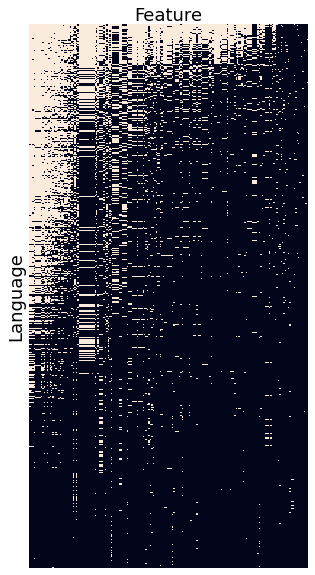

In [103]:
plt.subplots(figsize=(5, 10))
ax = sns.heatmap(wd.present_values_sorted, cbar=False)
plt.xlabel('Feature')
plt.ylabel('Language')
ax.xaxis.set_label_position('top')
plt.xticks([])
plt.yticks([])
plt.savefig('sparsity_full.png', dpi=200)
plt.show()

So we could just draw a box in the top-left corner and get a set of languages and a set of features such that all those languages have most of those features. But I feel like this is missing something: a handful of well-documented languages are documented... oddly, in that they're missing a lot of the well-covered features but make up for it by having lots of poorly documented features.

Instead, what about doing an iterative process, where we kill the least-documented feature, then recount, then kill the ten least-documented features, then recount, and so on until we reach some threshold of density. This should produce a set of languages and a set of features whose density is as high as possible.

In [11]:
sub1 = wd.choose_and_evaluate_features_and_languages(
    wd.present_values_sorted,
    density_threshold=0.9,
    n_features_to_drop=1,
    n_languages_to_drop=5,
)

Iteration 5: reached density 21.5%
Iteration 10: reached density 24.2%
Iteration 15: reached density 27.3%
Iteration 20: reached density 30.9%
Iteration 25: reached density 34.6%
Iteration 30: reached density 38.2%
Iteration 35: reached density 40.8%
Iteration 40: reached density 47.5%
Iteration 45: reached density 53.2%
Iteration 50: reached density 58.8%
Iteration 55: reached density 63.0%
Iteration 60: reached density 69.1%
Iteration 65: reached density 74.9%
Iteration 70: reached density 80.1%
Iteration 75: reached density 86.8%
Iteration 78: reached density 90.1%
Kept 191 languages and 91 features
The naive approach would have a density of 80.4%


In [12]:
sub2 = wd.choose_and_evaluate_features_and_languages(
    wd.present_values_sorted,
    density_threshold=0.95,
    n_features_to_drop=1,
    n_languages_to_drop=5,
)

Iteration 5: reached density 21.5%
Iteration 10: reached density 24.2%
Iteration 15: reached density 27.3%
Iteration 20: reached density 30.9%
Iteration 25: reached density 34.6%
Iteration 30: reached density 38.2%
Iteration 35: reached density 40.8%
Iteration 40: reached density 47.5%
Iteration 45: reached density 53.2%
Iteration 50: reached density 58.8%
Iteration 55: reached density 63.0%
Iteration 60: reached density 69.1%
Iteration 65: reached density 74.9%
Iteration 70: reached density 80.1%
Iteration 75: reached density 86.8%
Iteration 80: reached density 91.8%
Iteration 85: reached density 95.4%
Kept 140 languages and 82 features
The naive approach would have a density of 83.3%


In [13]:
sub3 = wd.choose_and_evaluate_features_and_languages(
    wd.present_values_sorted,
    density_threshold=0.95,
    n_features_to_drop=1,
    n_languages_to_drop=4,
)

Iteration 5: reached density 21.5%
Iteration 10: reached density 24.2%
Iteration 15: reached density 27.3%
Iteration 20: reached density 30.4%
Iteration 25: reached density 34.0%
Iteration 30: reached density 37.6%
Iteration 35: reached density 40.8%
Iteration 40: reached density 47.5%
Iteration 45: reached density 52.5%
Iteration 50: reached density 57.4%
Iteration 55: reached density 61.2%
Iteration 60: reached density 66.5%
Iteration 65: reached density 71.5%
Iteration 70: reached density 77.0%
Iteration 75: reached density 82.3%
Iteration 80: reached density 88.9%
Iteration 85: reached density 93.1%
Iteration 88: reached density 95.9%
Kept 183 languages and 67 features
The naive approach would have a density of 80.6%


In [14]:
sub4 = wd.choose_and_evaluate_features_and_languages(
    wd.present_values_sorted,
    density_threshold=0.95,
    n_features_to_drop=1,
    n_languages_to_drop=2,
)

Iteration 5: reached density 21.5%
Iteration 10: reached density 24.2%
Iteration 15: reached density 27.3%
Iteration 20: reached density 30.0%
Iteration 25: reached density 32.2%
Iteration 30: reached density 35.9%
Iteration 35: reached density 37.9%
Iteration 40: reached density 42.2%
Iteration 45: reached density 47.5%
Iteration 50: reached density 51.1%
Iteration 55: reached density 54.0%
Iteration 60: reached density 58.8%
Iteration 65: reached density 62.8%
Iteration 70: reached density 66.4%
Iteration 75: reached density 70.8%
Iteration 80: reached density 74.6%
Iteration 85: reached density 79.0%
Iteration 90: reached density 83.6%
Iteration 95: reached density 88.0%
Iteration 100: reached density 91.7%
Iteration 103: reached density 95.4%
Kept 280 languages and 40 features
The naive approach would have a density of 85.5%


In [15]:
sub5 = wd.choose_and_evaluate_features_and_languages(
    wd.present_values_sorted,
    density_threshold=0.98,
    n_features_to_drop=1,
    n_languages_to_drop=2,
)

Iteration 5: reached density 21.5%
Iteration 10: reached density 24.2%
Iteration 15: reached density 27.3%
Iteration 20: reached density 30.0%
Iteration 25: reached density 32.2%
Iteration 30: reached density 35.9%
Iteration 35: reached density 37.9%
Iteration 40: reached density 42.2%
Iteration 45: reached density 47.5%
Iteration 50: reached density 51.1%
Iteration 55: reached density 54.0%
Iteration 60: reached density 58.8%
Iteration 65: reached density 62.8%
Iteration 70: reached density 66.4%
Iteration 75: reached density 70.8%
Iteration 80: reached density 74.6%
Iteration 85: reached density 79.0%
Iteration 90: reached density 83.6%
Iteration 95: reached density 88.0%
Iteration 100: reached density 91.7%
Iteration 105: reached density 96.5%
Iteration 108: reached density 98.6%
Kept 229 languages and 35 features
The naive approach would have a density of 86.2%


I'd rather have more languages (i.e. more confidence in estimates) than more features, so I'm going with the 2:1 dropping ratio. I've incorporated `sub4` and `sub5` into the `walsdata` module as `s280` and `s229` respectively.

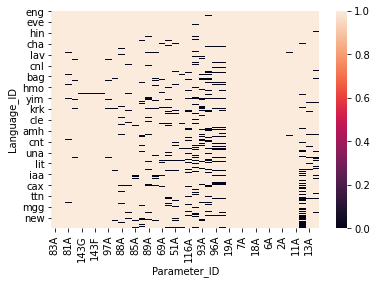

In [16]:
sns.heatmap(s280.present_values)
plt.show()

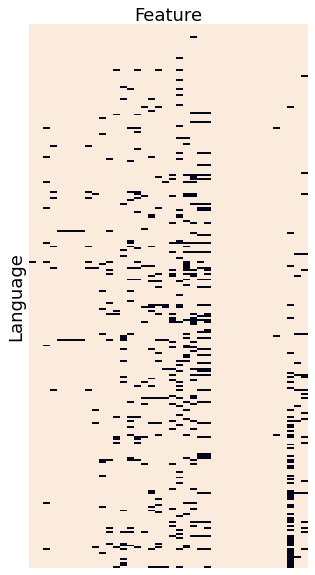

In [111]:
plt.subplots(figsize=(5, 10))
ax = sns.heatmap(s280.present_values, cbar=False)
plt.xlabel('Feature')
plt.ylabel('Language')
ax.xaxis.set_label_position('top')
plt.xticks([])
plt.yticks([])
plt.savefig('sparsity_s280.png', dpi=200)
plt.show()

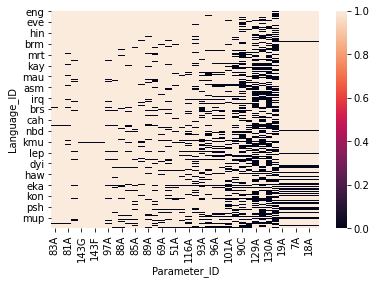

In [17]:
sns.heatmap(wd.present_values_sorted.iloc[:280, :40])
plt.show()

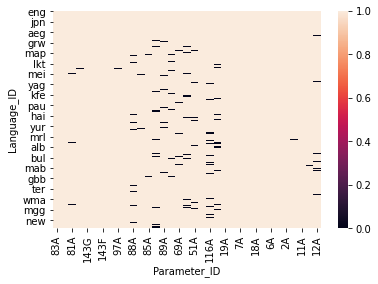

In [18]:
sns.heatmap(s229.present_values)
plt.show()

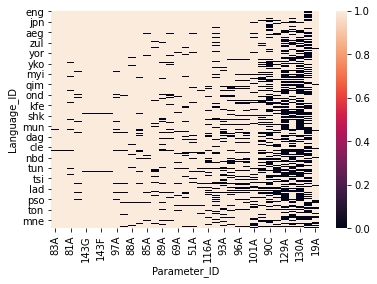

In [19]:
sns.heatmap(wd.present_values_sorted.iloc[:229, :35])
plt.show()

### Is 229 languages, 35 features good enough?

In [20]:
s229.langs

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,ISO_codes,Samples_100,Samples_200,geometry
8,abk,Abkhaz,NaN,43.083333,41.000000,abkh1244,abk,Northwest Caucasian,NaN,Northwest Caucasian,abk,True,True,POINT (41.00000 43.08333)
34,aeg,Arabic (Egyptian),NaN,30.000000,31.000000,egyp1253,arz,Afro-Asiatic,NaN,Semitic,arz,True,True,POINT (31.00000 30.00000)
54,ain,Ainu,NaN,43.000000,143.000000,ainu1240,ain,NaN,NaN,NaN,ain,False,True,POINT (143.00000 43.00000)
66,akn,Akan,NaN,6.500000,-1.250000,akan1250,aka,Niger-Congo,NaN,Kwa,aka,False,False,POINT (-1.25000 6.50000)
70,ala,Alamblak,NaN,-4.666667,143.333333,alam1246,amp,Sepik,NaN,Sepik Hill,amp,True,True,POINT (143.33333 -4.66667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,yko,Yukaghir (Kolyma),NaN,65.750000,150.833333,sout2750,yux,Yukaghir,NaN,Yukaghir,yux,False,True,POINT (150.83333 65.75000)
2609,yor,Yoruba,NaN,8.000000,4.333333,yoru1245,yor,Niger-Congo,Benue-Congo,Defoid,yor,True,True,POINT (4.33333 8.00000)
2620,yuc,Yuchi,NaN,35.750000,-86.750000,yuch1247,yuc,NaN,NaN,NaN,yuc,False,True,POINT (-86.75000 35.75000)
2625,yur,Yurok,NaN,41.333333,-124.000000,yuro1248,yur,Algic,NaN,Yurok,yur,False,True,POINT (-124.00000 41.33333)


In [21]:
print(s229.lang_names)

['Abkhaz', 'Arabic (Egyptian)', 'Ainu', 'Akan', 'Alamblak', 'Albanian', 'Amele', 'Amharic', 'Arrernte (Mparntwe)', 'Araona', 'Angas', 'Ao', 'Apurinã', 'Archi', 'Armenian (Eastern)', 'Arapesh (Mountain)', 'Asmat', 'Awa Pit', 'Aymara (Central)', 'Bagirmi', 'Bawm', 'Beja', 'Birom', 'Batak (Karo)', 'Breton', 'Burmese', 'Bashkir', 'Basque', 'Bulgarian', 'Burushaski', 'Cahuilla', 'Carib', 'Chamorro', 'Chukchi', 'Chinantec (Quiotepec)', 'Chuvash', 'Chinantec (Lealao)', 'Comanche', 'Canela', 'Cantonese', 'Coos (Hanis)', 'Cubeo', 'Dagur', 'Diegueño (Mesa Grande)', 'Dinka', 'Diola-Fogny', 'Doyayo', 'Drehu', 'Dyirbal', 'English', 'Epena Pedee', 'Evenki', 'Ewe', 'Ewondo', 'Fijian', 'Finnish', 'French', 'Fur', 'Fyem', 'Garo', 'Gbeya Bossangoa', 'Georgian', 'German', 'Grebo', 'Greek (Modern)', 'Greenlandic (West)', 'Guaraní', 'Haida', 'Hausa', 'Hawaiian', 'Hindi', 'Hixkaryana', 'Hmong Njua', 'Huastec', 'Hungarian', 'Hupa', 'Huave (San Mateo del Mar)', 'Hunzib', 'Iaai', 'Iban', 'Ijo (Kolokuma)', 'Ik'

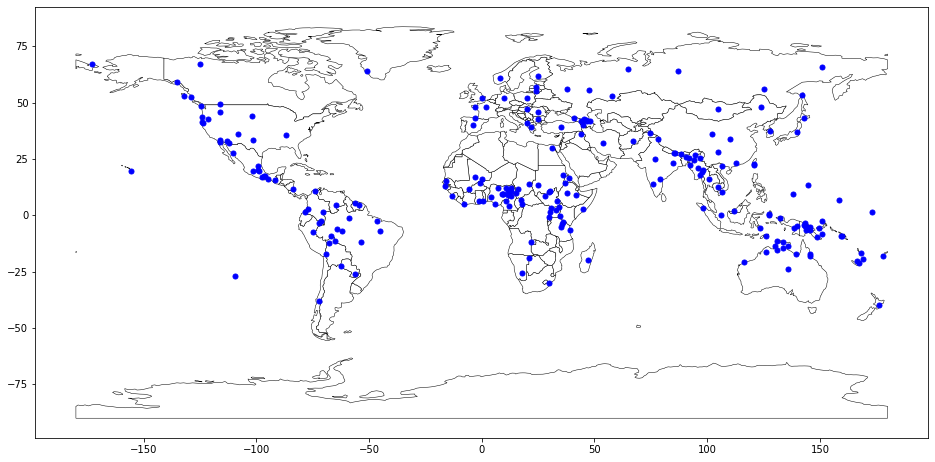

In [22]:
langmap.plot(s229.langs)

In [23]:
s229.features

,ID,Name,Description,Contributor_ID,Chapter,Area
0,1A,Consonant Inventories,NaN,maddiesoni,Consonant Inventories,Phonology
1,2A,Vowel Quality Inventories,NaN,maddiesoni,Vowel Quality Inventories,Phonology
2,3A,Consonant-Vowel Ratio,NaN,maddiesoni,Consonant-Vowel Ratio,Phonology
3,4A,Voicing in Plosives and Fricatives,NaN,maddiesoni,Voicing in Plosives and Fricatives,Phonology
4,5A,Voicing and Gaps in Plosive Systems,NaN,maddiesoni,Voicing and Gaps in Plosive Systems,Phonology
5,6A,Uvular Consonants,NaN,maddiesoni,Uvular Consonants,Phonology
6,7A,Glottalized Consonants,NaN,maddiesoni,Glottalized Consonants,Phonology
7,8A,Lateral Consonants,NaN,maddiesoni,Lateral Consonants,Phonology
11,11A,Front Rounded Vowels,NaN,maddiesoni,Front Rounded Vowels,Phonology
12,12A,Syllable Structure,NaN,maddiesoni,Syllable Structure,Phonology


In [24]:
len(s229.values)

7902

### What about expanding to 280 languages, 40 features?

In [25]:
s280.langs

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family,Subfamily,Genus,ISO_codes,Samples_100,Samples_200,geometry
7,abi,Abipón,NaN,-29.000000,-61.000000,abip1241,axb,Guaicuruan,NaN,South Guaicuruan,axb,False,True,POINT (-61.00000 -29.00000)
8,abk,Abkhaz,NaN,43.083333,41.000000,abkh1244,abk,Northwest Caucasian,NaN,Northwest Caucasian,abk,True,True,POINT (41.00000 43.08333)
23,aco,Acoma,NaN,34.916667,-107.583333,west2632,kjq,Keresan,NaN,Keresan,kjq,True,True,POINT (-107.58333 34.91667)
34,aeg,Arabic (Egyptian),NaN,30.000000,31.000000,egyp1253,arz,Afro-Asiatic,NaN,Semitic,arz,True,True,POINT (31.00000 30.00000)
54,ain,Ainu,NaN,43.000000,143.000000,ainu1240,ain,NaN,NaN,NaN,ain,False,True,POINT (143.00000 43.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,yur,Yurok,NaN,41.333333,-124.000000,yuro1248,yur,Algic,NaN,Yurok,yur,False,True,POINT (-124.00000 41.33333)
2637,zan,Zande,NaN,4.000000,26.000000,zand1248,zne,Niger-Congo,Adamawa-Ubangi,Ubangi,zne,False,False,POINT (26.00000 4.00000)
2651,zqc,Zoque (Copainalá),NaN,17.000000,-93.250000,copa1236,zoc,Mixe-Zoque,NaN,Mixe-Zoque,zoc,True,True,POINT (-93.25000 17.00000)
2658,zul,Zulu,NaN,-30.000000,30.000000,zulu1248,zul,Niger-Congo,Benue-Congo,Bantoid,zul,True,True,POINT (30.00000 -30.00000)


In [26]:
print(s280.lang_names)

['Abipón', 'Abkhaz', 'Acoma', 'Arabic (Egyptian)', 'Ainu', 'Akan', 'Alamblak', 'Albanian', 'Amele', 'Amharic', 'Arrernte (Mparntwe)', 'Araona', 'Angas', '//Ani', 'Ao', 'Apurinã', 'Archi', 'Armenian (Eastern)', 'Arapesh (Mountain)', 'Asmat', 'Atayal', 'Awa Pit', 'Aymara (Central)', 'Bagirmi', 'Bambara', 'Bawm', 'Bella Coola', 'Beja', 'Berta', 'Birom', 'Batak (Karo)', 'Berber (Middle Atlas)', 'Breton', 'Burmese', 'Bashkir', 'Basque', 'Bulgarian', 'Burushaski', 'Cahuilla', 'Carib', 'Campa (Axininca)', 'Chamorro', 'Cherokee', 'Chukchi', 'Chinantec (Quiotepec)', 'Chuvash', 'Chinantec (Lealao)', 'Comanche', 'Canela', 'Cantonese', 'Coos (Hanis)', 'Cree (Plains)', 'Cubeo', 'Cayuvava', 'Daga', 'Dagur', 'Diegueño (Mesa Grande)', 'Dinka', 'Diola-Fogny', 'Dani (Lower Grand Valley)', 'Doyayo', 'Drehu', 'Dyirbal', 'English', 'Epena Pedee', 'Evenki', 'Ewe', 'Ewondo', 'Fijian', 'Finnish', 'French', 'Fur', 'Fyem', 'Garo', 'Gbeya Bossangoa', 'Georgian', 'German', 'Gooniyandi', 'Grebo', 'Greek (Modern)',

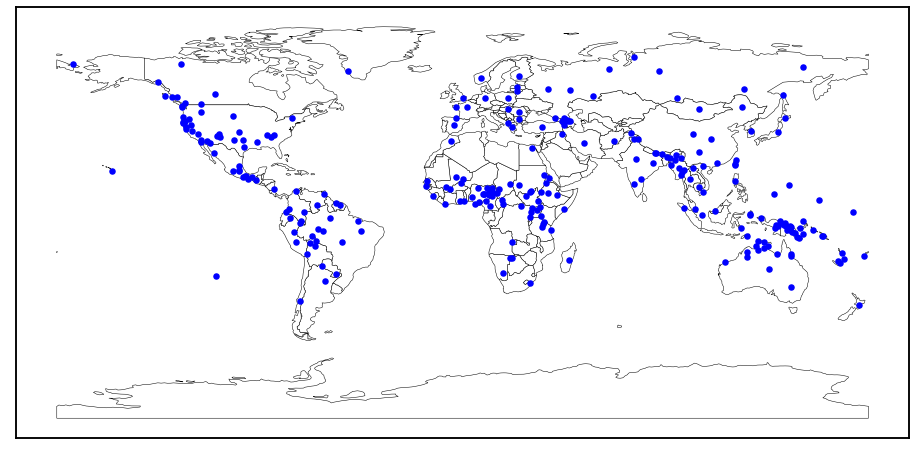

In [114]:
langmap.plot(s280.langs)
plt.xticks([])
plt.yticks([])
plt.savefig('s280_map.png')
plt.show()

In [28]:
s280.features

,ID,Name,Description,Contributor_ID,Chapter,Area
0,1A,Consonant Inventories,NaN,maddiesoni,Consonant Inventories,Phonology
1,2A,Vowel Quality Inventories,NaN,maddiesoni,Vowel Quality Inventories,Phonology
2,3A,Consonant-Vowel Ratio,NaN,maddiesoni,Consonant-Vowel Ratio,Phonology
3,4A,Voicing in Plosives and Fricatives,NaN,maddiesoni,Voicing in Plosives and Fricatives,Phonology
4,5A,Voicing and Gaps in Plosive Systems,NaN,maddiesoni,Voicing and Gaps in Plosive Systems,Phonology
5,6A,Uvular Consonants,NaN,maddiesoni,Uvular Consonants,Phonology
6,7A,Glottalized Consonants,NaN,maddiesoni,Glottalized Consonants,Phonology
7,8A,Lateral Consonants,NaN,maddiesoni,Lateral Consonants,Phonology
11,11A,Front Rounded Vowels,NaN,maddiesoni,Front Rounded Vowels,Phonology
12,12A,Syllable Structure,NaN,maddiesoni,Syllable Structure,Phonology


I don't think I gain enough by expanding like this to be worth dealing with the missing data, but I'll keep it around just in case.

In [29]:
len(s280.values)

10687

### Which features are redundant?

Some of these features are redundant. I identify three groups: the 81A/82A/83A trio, where the value of 81A logically implies 82A and 83A; the 143 group, where 143A logically implies 143E, 143F, and 143G, and the 95A/96A/97A trio, which are crosstabs of 83A with 85A/90A/87A.

In [30]:
def check_word_order_trio(sample):
    print(f'81A (SOV word order): {sample.fcount("81A")}')
    print(f'82A (SV word order): {sample.fcount("82A")}')
    print(f'83A (OV word order): {sample.fcount("83A")}')

In [31]:
check_word_order_trio(s280)

81A (SOV word order): 271
82A (SV word order): 280
83A (OV word order): 279


In [32]:
check_word_order_trio(s229)

81A (SOV word order): 226
82A (SV word order): 229
83A (OV word order): 229


So the thing is, 82A and 83A are sometimes more informative than 81A, either because 81A is missing or because there's only a partial restriction on word order (e.g. a language that flips easily between SVO and SOV has "no dominant order" for 81A but "Subject-Verb" for 82A). On the other hand, only 81A picks up the rare orders like OSV. So I think I actually need to keep all three, keeping in mind that I'll probably have to filter out correlations between these.

In [33]:
def check_negation_group(sample):
    print(f'143A (general negation): {sample.fcount("143A")}')
    print(f'143E (preverbal negation): {sample.fcount("143E")}')
    print(f'143F (postverbal negation): {sample.fcount("143F")}')
    print(f'143G (minor negation): {sample.fcount("143G")}')

In [34]:
check_negation_group(s280)

143A (general negation): 278
143E (preverbal negation): 278
143F (postverbal negation): 278
143G (minor negation): 278


In [35]:
check_negation_group(s229)

143A (general negation): 229
143E (preverbal negation): 229
143F (postverbal negation): 229
143G (minor negation): 229


These have the same coverage level. Throw away 143E and 143F, these are completely recoverable from 143A. 143G has information missed by 143A, so keep it.

In [36]:
def check_crosstab_features(sample):
    print(f'83A (OV word order): {sample.fcount("83A")}')
    try:
        print(f'\t85A => 95A (Adposition order): {sample.fcount("85A")} => {sample.fcount("95A")}')
    except KeyError:
        pass
    try:
        print(f'\t90A => 96A (Relative clause order): {sample.fcount("90A")} => {sample.fcount("96A")}')
    except KeyError:
        pass
    try:
        print(f'\t87A => 97A (Adjective order): {sample.fcount("87A")} => {sample.fcount("97A")}')
    except KeyError:
        pass

In [37]:
check_crosstab_features(s280)

83A (OV word order): 279
	85A => 95A (Adposition order): 270 => 260
	90A => 96A (Relative clause order): 235 => 242
	87A => 97A (Adjective order): 274 => 273


In [38]:
check_crosstab_features(s229)

83A (OV word order): 229
	85A => 95A (Adposition order): 226 => 222
	87A => 97A (Adjective order): 228 => 228


There may be something here to use in imputing, but it looks like it's only in the S280 sample, and only in the relative clause features. I can come back to this if it turns out to be important, but for now let's drop these crosstab features.

In [39]:
len(s280d.features)

35

In [40]:
len(s229d.features)

31

### Which features are ordinal and which are categorical?

The features in WALS are all coded as numbers, but some of these numbers are lies. For example, the feature 19A "Presence of Uncommon Consonants" is coded as numbers 1 through 7, but these numbers represent all sorts of unrelated things: 1 is "no uncommon consonants", 2 is "click consonants", 3 is "labial-velar consonants", 4 is "pharyngeals", etc. These are totally different kinds of consonants, not points on a spectrum, so they need to be one-hot encoded. Even worse, the values 6 and 7 are combinations of other features, so they need to be coded as ones in two columns, not as their own columns.

In contrast, features like 1A "Consonant Inventories" are already in a natural order, from 1 "small" to 5 "large", so they're fine the way they are.

So let's go through all the S280 features and indicate how they need to be coded.

In [41]:
print(s280d.features_list)

['1A', '2A', '3A', '4A', '5A', '6A', '7A', '8A', '11A', '12A', '13A', '18A', '19A', '26A', '33A', '51A', '57A', '69A', '70A', '81A', '82A', '83A', '85A', '86A', '87A', '88A', '89A', '90A', '92A', '93A', '112A', '116A', '143A', '143G', '144A']


In [42]:
s280d.value_names('1A') # Ordinal

,Name
Number,
1,Small
2,Moderately small
3,Average
4,Moderately large
5,Large


In [43]:
s280d.value_names('2A') # Ordinal

,Name
Number,
1,Small (2-4)
2,Average (5-6)
3,Large (7-14)


In [44]:
s280d.value_names('3A') # Ordinal

,Name
Number,
1,Low
2,Moderately low
3,Average
4,Moderately high
5,High


In [45]:
s280d.value_names('4A')
# Encode as two binary features, 'voicing in plosives' and 'voicing in fricatives'
# 1 -> [0, 0], 2 -> [1, 0], 3 -> [0, 1], 4 -> [1, 1]

,Name
Number,
1,No voicing contrast
2,In plosives alone
3,In fricatives alone
4,In both plosives and fricatives


In [46]:
s280d.value_names('5A')
# Encode as three binary features, 'missing p', 'missing g', and 'missing other'
# 1 -> [0, 0, 1], 2 -> [0, 0, 0], 3 -> [1, 0, 0], 4 -> [0, 1, 0], 5 -> [1, 1, 0]
# Zero out any languages that also have 0 for 'voicing in plosives' (see 5A)

,Name
Number,
1,Other
2,None missing in /p t k b d g/
3,Missing /p/
4,Missing /g/
5,Both missing


In [132]:
pd.DataFrame(
    {
        'Missing /p/': [0, 0, 1, 0, 1],
        'Missing /g/': [0, 0, 0, 1, 1],
        'Missing Other': [1, 0, 0, 0, 0],
    },
    index=range(1, 6)
)

,Missing /p/,Missing /g/,Missing Other
1,0,0,1
2,0,0,0
3,1,0,0
4,0,1,0
5,1,1,0


In [47]:
s280d.value_names('6A')
# Encode as two binary features, 'uvular stops' and 'uvular continuants'
# 1 -> [0, 0], 2 -> [1, 0], 3 -> [0, 1], 4 -> [1, 1]

,Name
Number,
1,None
2,Uvular stops only
3,Uvular continuants only
4,Uvular stops and continuants


In [48]:
s280d.value_names('7A')
# Encode as three binary features, 'ejectives', 'implosives', and 'glottalized resonants'

,Name
Number,
1,No glottalized consonants
2,Ejectives only
3,Implosives only
4,Glottalized resonants only
5,Ejectives and implosives
6,Ejectives and glottalized resonants
7,Implosives and glottalized resonants
8,"Ejectives, implosives, and glottalized resonants"


In [49]:
s280d.value_names('8A')
# Encode as two binary features, 'l' and 'obstruent laterals', combine 3 with 1

,Name
Number,
1,No laterals
2,"/l/, no obstruent laterals"
3,"Laterals, but no /l/, no obstruent laterals"
4,/l/ and lateral obstruent
5,"No /l/, but lateral obstruents"


In [50]:
s280d.value_names('11A') # Encode as two binary features, 'mid' and 'high'

,Name
Number,
1,None
2,High and mid
3,High only
4,Mid only


In [51]:
s280d.value_names('12A') # Ordinal

,Name
Number,
1,Simple
2,Moderately complex
3,Complex


In [52]:
s280d.value_names('13A') # Ordinal

,Name
Number,
1,No tones
2,Simple tone system
3,Complex tone system


In [53]:
s280d.value_names('18A')
# Encode as three binary features, 'no bilabials', 'no fricatives', and 'no nasals'

,Name
Number,
1,All present
2,No bilabials
3,No fricatives
4,No nasals
5,No bilabials or nasals
6,No fricatives or nasals


In [54]:
s280d.value_names('19A')
# Encode as four binary features, 'clicks', 'labial-velars', 'pharyngeals', 'th sounds'

,Name
Number,
1,None
2,Clicks
3,Labial-velars
4,Pharyngeals
5,'Th' sounds
6,"Clicks, pharyngeals, and 'th'"
7,"Pharyngeals and ""th"""


In [55]:
s280d.value_names('26A')
# Almost ordinal, but recode 1 as 4 (little affixation is neutral, not extreme)

,Name
Number,
1,Little affixation
2,Strongly suffixing
3,Weakly suffixing
4,Equal prefixing and suffixing
5,Weakly prefixing
6,Strong prefixing


In [56]:
s280d.value_names('33A') # Full one-hot, setting 'no plural' to all zeros

,Name
Number,
1,Plural prefix
2,Plural suffix
3,Plural stem change
4,Plural tone
5,Plural complete reduplication
6,Mixed morphological plural
7,Plural word
8,Plural clitic
9,No plural


In [57]:
s280d.value_names('51A') # Full one-hot, setting 'no case affixes' to all zeros

,Name
Number,
1,Case suffixes
2,Case prefixes
3,Case tone
4,Case stem change
5,Mixed morphological case
6,Postpositional clitics
7,Prepositional clitics
8,Inpositional clitics
9,No case affixes or adpositional clitics


In [58]:
s280d.value_names('57A')
# Encode as two binary variables, 'possessive prefixes' and 'possessive suffixes'

,Name
Number,
1,Possessive prefixes
2,Possessive suffixes
3,Prefixes and suffixes
4,No possessive affixes


In [59]:
s280d.value_names('69A') # Full one-hot, setting 'no tense-aspect inflection' to all zeros

,Name
Number,
1,Tense-aspect prefixes
2,Tense-aspect suffixes
3,Tense-aspect tone
4,Mixed type
5,No tense-aspect inflection


In [60]:
s280d.value_names('70A')
# Encode as three binary variables, 'second singular', 'second plural', and 'second number distinguished'
# 1 -> [1, 1, 1], 2 -> [1, 0, 1], 3 -> [0, 1, 1], 4 -> [1, 1, 0], 5 -> [0, 0, 0]

,Name
Number,
1,Second singular and second plural
2,Second singular
3,Second plural
4,Second person number-neutral
5,No second-person imperatives


In [61]:
s280d.value_names('81A') # Full one-hot

,Name
Number,
1,SOV
2,SVO
3,VSO
4,VOS
5,OVS
6,OSV
7,No dominant order


In [133]:
pd.DataFrame(
    {
        'SOV': [1, 0, 0, 0, 0, 0, 0],
        'SVO': [0, 1, 0, 0, 0, 0, 0],
        'VSO': [0, 0, 1, 0, 0, 0, 0],
        'VOS': [0, 0, 0, 1, 0, 0, 0],
        'OVS': [0, 0, 0, 0, 1, 0, 0],
        'OSV': [0, 0, 0, 0, 0, 1, 0],
        'Mixed': [0, 0, 0, 0, 0, 0, 1],
    },
    index=range(1, 8)
)

,SOV,SVO,VSO,VOS,OVS,OSV,Mixed
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0
7,0,0,0,0,0,0,1


In [62]:
s280d.value_names('82A') # Full one-hot

,Name
Number,
1,SV
2,VS
3,No dominant order


In [63]:
s280d.value_names('83A') # Full one-hot

,Name
Number,
1,OV
2,VO
3,No dominant order


In [64]:
s280d.value_names('85A') # One-hot, 5 to all zeros

,Name
Number,
1,Postpositions
2,Prepositions
3,Inpositions
4,No dominant order
5,No adpositions


In [65]:
s280d.value_names('86A') # Full one-hot

,Name
Number,
1,Genitive-Noun
2,Noun-Genitive
3,No dominant order


In [66]:
s280d.value_names('87A') # Full one-hot

,Name
Number,
1,Adjective-Noun
2,Noun-Adjective
3,No dominant order
4,Only internally-headed relative clauses


In [67]:
s280d.value_names('88A') # Full one-hot

,Name
Number,
1,Demonstrative-Noun
2,Noun-Demonstrative
3,Demonstrative prefix
4,Demonstrative suffix
5,Demonstrative before and after Noun
6,Mixed


In [68]:
s280d.value_names('89A') # Full one-hot

,Name
Number,
1,Numeral-Noun
2,Noun-Numeral
3,No dominant order
4,Numeral only modifies verb


In [69]:
s280d.value_names('90A') # Full one-hot

,Name
Number,
1,Noun-Relative clause
2,Relative clause-Noun
3,Internally headed
4,Correlative
5,Adjoined
6,Doubly headed
7,Mixed


In [70]:
s280d.value_names('92A') # One-hot, 6 to all zeros

,Name
Number,
1,Initial
2,Final
3,Second position
4,Other position
5,In either of two positions
6,No question particle


In [71]:
s280d.value_names('93A') # Full one-hot

,Name
Number,
1,Initial interrogative phrase
2,Not initial interrogative phrase
3,Mixed


In [72]:
s280d.value_names('112A') # Full one-hot, except 5 coded as 1+2

,Name
Number,
1,Negative affix
2,Negative particle
3,Negative auxiliary verb
4,"Negative word, unclear if verb or particle"
5,Variation between negative word and affix
6,Double negation


In [73]:
s280d.value_names('116A') # One hot, 3 as 1+2, 7 as all zeros

,Name
Number,
1,Question particle
2,Interrogative verb morphology
3,Mixture of previous two types
4,Interrogative word order
5,Absence of declarative morphemes
6,Interrogative intonation only
7,No interrogative-declarative distinction


In [74]:
s280d.value_names('143A')
# One-hot encode 1-5
# 6-11 are combinations of 1-4
# Encode 12 as 3
# Encode everything else as an extra category 6.

,Name
Number,
1,NegV
2,VNeg
3,[Neg-V]
4,[V-Neg]
5,Negative Tone
6,Type 1 / Type 2
7,Type 1 / Type 3
8,Type 1 / Type 4
9,Type 2 / Type 3


In [75]:
s280d.value_names('143G') # One-hot encode, 4 to all zeros

,Name
Number,
1,NegTone
2,NegInfix
3,NegStemChange
4,None


In [76]:
s280d.value_names('144A')
# Mirror the question particle category:
# 1 = Initial (from 1, 5, 9, 12)
# 2 = Final (from 4, 8, 11, 15)
# 3 = Second (from 2, 6, 13)
# 4 = Other (from 3, 7, 10, 14)
# 5 = Mixed (from 16-21)
# Then one-hot encode

,Name
Number,
1,NegSVO
2,SNegVO
3,SVNegO
4,SVONeg
5,NegSOV
6,SNegOV
7,SONegV
8,SOVNeg
9,NegVSO


### Encoding

In [77]:
s229d.values.head()

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Example_ID
156,1A-abk,abk,1A,5,1A-5,NaN,Hewitt-1979,NaN
157,2A-abk,abk,2A,1,2A-1,NaN,Hewitt-1979,NaN
158,3A-abk,abk,3A,5,3A-5,NaN,Hewitt-1979,NaN
159,4A-abk,abk,4A,4,4A-4,NaN,Hewitt-1979,NaN
160,5A-abk,abk,5A,2,5A-2,NaN,Hewitt-1979,NaN


In [78]:
s229d.values_matrix

Parameter_ID,1A,2A,3A,4A,5A,6A,7A,8A,11A,12A,...,86A,87A,88A,89A,93A,112A,116A,143A,143G,144A
Language_ID,,,,,,,,,,,,,,,,,,,,,
eng,3,3,1,4,2,1,1,2,1,3,...,3,1,1,1,1,2,4,1,4,2
fre,3,3,1,4,2,3,1,2,2,3,...,2,2,1,1,1,2,1,15,4,19
ger,3,3,1,4,2,3,1,2,2,3,...,2,1,1,1,1,2,4,6,4,16
rus,4,2,5,4,2,1,1,2,1,3,...,2,1,1,1,1,2,1,1,4,2
grk,3,2,3,4,2,1,1,2,1,3,...,2,1,1,1,1,2,1,1,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kwo,3,3,3,3,1,1,1,1,1,2,...,1,1,1,1,2,1,1,15,4,19
wah,2,2,3,1,1,1,1,2,1,2,...,1,2,2,2,2,-1,1,1,4,21
anc,4,3,4,4,2,1,3,2,1,3,...,2,2,2,2,2,4,1,2,4,4


In [79]:
s229d.values_encoded

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
eng,3,3,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
fre,3,3,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
ger,3,3,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
rus,4,2,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
grk,3,2,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kwo,3,3,3,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
wah,2,2,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
anc,4,3,4,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [82]:
s229d.values_scaled

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
eng,0.50,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fre,0.50,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
ger,0.50,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
rus,0.75,0.5,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
grk,0.50,0.5,0.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kwo,0.50,1.0,0.50,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
wah,0.25,0.5,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
anc,0.75,1.0,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [83]:
s229d.values_scaled_imputed

,1A,2A,3A,4A_2,4A_3,5A_1,5A_3,5A_4,6A_2,6A_3,...,143A_2,143A_3,143A_4,143A_6,143G_1,144A_1,144A_2,144A_3,144A_4,144A_5
Language_ID,,,,,,,,,,,,,,,,,,,,,
eng,0.50,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fre,0.50,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
ger,0.50,1.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
rus,0.75,0.5,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
grk,0.50,0.5,0.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kwo,0.50,1.0,0.50,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
wah,0.25,0.5,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
anc,0.75,1.0,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
